# **PYBTCMP - 11**

**Grup Adı: Global-AI-Hub-Bests**

**Grup Üyeleri:** Kaan Çalışkan, Ceren Tabak Buru, Simge Meryem Sarıer, Korhan Köykıran, Kübra Usta

**Proje Konusu:** Veri setine göre uzun soluklu filmlerin hangi dilde oluşturulduğunun görselleştirilmesi

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores)


*   2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
*   İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
*   'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
*   'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
*   Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
*   IMDB puanı en yüksek olan ilk 10 film hangileridir?
*   IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
*   IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
*   'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
*   Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
*   Hangi dilde yayımlanan filmler en düşük ortalama IMDB puanına sahiptir? Görselleştiriniz.
*   Hangi yılın toplam "runtime" süresi en fazladır?
*   Her bir dilin en fazla kullanıldığı "Genre" nedir?
*   Veri setinde outlier veri var mıdır? Açıklayınız.




















İlk olarak kütüphanelere erişimi sağlayalım.
Akabinde localimizde yer alan .csv formatındaki dosyayı colab'e upload edelim.

**Kaynak:**
https://www.youtube.com/watch?v=SHYAQHDQoU4&ab_channel=DigitalPeopleFolk

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals.csv


For loop oluşturarak dosyamızın tutulduğu dictionary key adını görelim.

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "NetflixOriginals.csv" with length 38678 bytes


Verimizi Dataframe haline getirelim. Ancak Kaynak1'deki işlemi yapınca utf_8_decode hatasını alıyoruz. Dolayısıyla Kaynak2'de önerildiği şekilde 'ISO-8859-1' yöntemini uyguluyoruz. 

Kaynak1: https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html

Kaynak2: https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

In [ ]:
Netflix_Originals_df = pd.read_csv('NetflixOriginals.csv', encoding=('ISO-8859-1'))
print(Netflix_Originals_df)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

Son olarak, Dataframe halinde verimiz nasıl yansıyor test edelim.

In [ ]:
Netflix_Originals_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


**Adım1:** 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştirelim.

**Kaynak1:**https://www.youtube.com/watch?v=u77mA9fM9Y0&ab_channel=DataCapitalist

**Kaynak2:** https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/#:~:text=To%20convert%20a%20column%20that,use%20astype()%20to%20convert.&text=Copy-,Use%20DataFrame.,values%20with%20integer%20value%20zero.

In [175]:
Netflix_Originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    string        
 1   Genre       584 non-null    string        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    string        
 6   year        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(3)
memory usage: 32.1 KB


In [ ]:
#Premiere sütunundaki datatype'ı tarih formatına dönüştürelim.
Netflix_Originals_df["Premiere"] = pd.to_datetime(Netflix_Originals_df["Premiere"])

In [ ]:
#Object olan datatype'ları string formata çevirelim.
Netflix_Originals_df = Netflix_Originals_df.astype({'Title':'string','Genre':'string', 'Language':'string'})

In [ ]:
#tüm datatype'lar istenilen formata dönüşmüş mü kontrol edelim.
print(Netflix_Originals_df.dtypes)

Title                 string
Genre                 string
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              string
dtype: object


In [ ]:
#İstenen tarih aralığı ve Genre'ye göre verimizi yansıtalım.
Netflix_Originals_df[(Netflix_Originals_df['Premiere'] > '2019-01-01') & (Netflix_Originals_df['Premiere'] < '2020-06-30') & (Netflix_Originals_df['Genre'] == 'Documentary')]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


**Adım2:** İngilizce dilinde çekilen filmler içerisinde hangi tür filmin en yüksek IMDB puanına sahip olduğunu  gözlemleyelim.

**Kaynak:** https://www.youtube.com/watch?v=5yFox2cReTw&ab_channel=datagy

In [ ]:
English_Netflix_Originals_df = (Netflix_Originals_df['Language'] =='English')
Netflix_Originals_df[English_Netflix_Originals_df].sort_values("IMDB Score", ascending=False).head(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


**Adım3:** 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' süresini gözlemleyelim.

In [ ]:
Netflix_Originals_df.mean(axis='index')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Runtime       93.577055
IMDB Score     6.271747
dtype: float64

In [ ]:
Hindi_Netflix_Originals_df = (Netflix_Originals_df['Language'] =='Hindi')
Netflix_Originals_df[Hindi_Netflix_Originals_df].mean(axis='index')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Runtime       115.787879
IMDB Score      5.981818
dtype: float64

**Adım4:** 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler neler görselleştirelim.

In [ ]:
#pd.set_option('display.max_rows', 115) --> Listenin tamamını görmek için kullanabilirsiniz.
Netflix_Originals_df['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Historical-epic                           1
Drama / Short                             1
Animation / Comedy                        1
Mentalism special                         1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: Int64

**Adım5:** Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulalım.

In [ ]:
Netflix_Originals_df['Language'].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: Int64

**Adım5:** IMDB puanı en yüksek olan ilk 10 filmi bulalım.

In [ ]:
Netflix_Originals_df.sort_values("IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


**Adım6:** IMDB puanı ile 'Runtime' arasındaki korelasyona bakalım.

**Kaynak:** https://www.youtube.com/watch?v=g2A18KpnDFg&ab_channel=MikaelMengistu

In [ ]:
Netflix_Originals_df.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


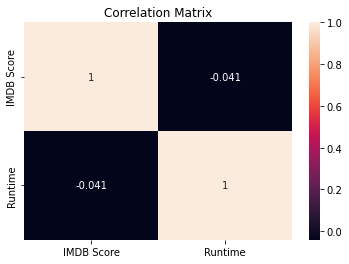

In [172]:
plt.title('Correlation Matrix')
sns.heatmap(Netflix_Originals_df[['IMDB Score', 'Runtime']].corr(), annot=True)

In [ ]:
print('Filmlerin izlenme sayısı arttıkça yapılan izleyici değerlendirmeleri de artmaktadır.\nBu da IMDB skorunu ortalama açısından negatif yönlü etkilemektedir.\nDolayısıyla, IMDB skoru ortalamaya yaklaşmaktadır.\nBu nedenle, Runtime ile IMDB Skoru arasında düşük seviyede negatif korelasyon ilişkisi görüyoruz.')

Filmlerin izlenme sayısı arttıkça yapılan izleyici değerlendirmeleri de artmaktadır.
Bu da IMDB skorunu ortalama açısından negatif yönlü etkilemektedir.
Dolayısıyla, IMDB skoru ortalamaya yaklaşmaktadır.
Bu nedenle, Runtime ile IMDB Skoru arasında düşük seviyede negatif korelasyon ilişkisi görüyoruz.


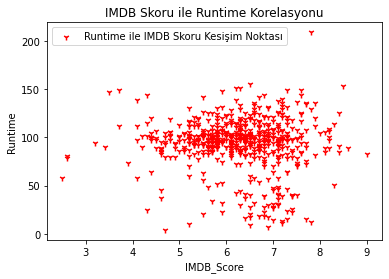

In [ ]:
IMDB_Score = Netflix_Originals_df['IMDB Score']
Runtime = Netflix_Originals_df['Runtime']

plt.scatter(IMDB_Score, Runtime, label='Runtime ile IMDB Skoru Kesişim Noktası', color='r', marker='1')
plt.xlabel('IMDB_Score')
plt.ylabel('Runtime')
plt.title('IMDB Skoru ile Runtime Korelasyonu')
plt.legend()
plt.show()

**Adım7:** IMDB Puanı en yüksek olan ilk 10 'Genre'yi görselleştirelim.

In [34]:
pd.pivot_table(Netflix_Originals_df, index='Genre', values='IMDB Score').sort_values("IMDB Score", ascending=False).head(10)

,IMDB Score
Genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
Making-of,7.450000
Action-adventure,7.300000
Historical drama,7.200000
Coming-of-age comedy-drama,7.200000


**Adım8:** 'Runtime' değeri en yüksek olan ilk 10 filmi görselleştirelim.

In [35]:
pd.pivot_table(Netflix_Originals_df, index='Title', values='Runtime').sort_values("Runtime", ascending=False).head(10)

,Runtime
Title,
The Irishman,209
Da 5 Bloods,155
Springsteen on Broadway,153
The Forest of Love,151
Citation,151
Raat Akeli Hai,149
The Last Days of American Crime,149
Ludo,149
Army of the Dead,148


**Adım9:** Hangi yılda en fazla film yayımlanmış görselleştirelim.

In [75]:
Netflix_Originals_df['year'] = Netflix_Originals_df['Premiere'].dt.year

In [76]:
Netflix_Originals_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [87]:
Netflix_Originals_df['year'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

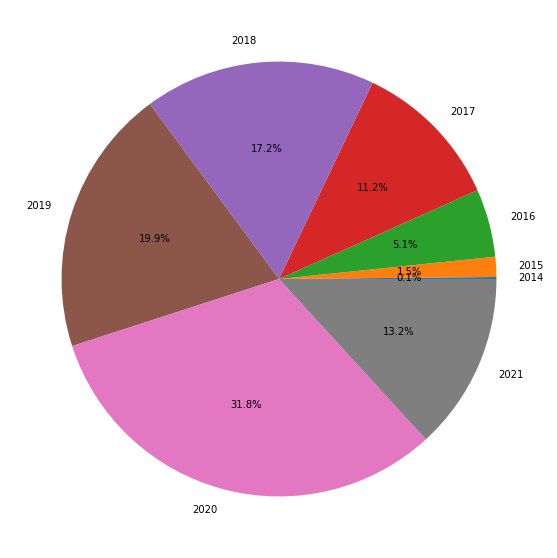

In [163]:
Netflix_Originals_df.groupby('year').sum().plot.pie(y='Runtime', autopct="%.1f%%", ylabel="", legend=False, figsize=(10,10))

**Adım10:** Hangi dilde yayımlanan filmlerin en düşük ortalama IMDB puanına sahip olduğunu görselleştirelim.

In [108]:
x = pd.pivot_table(Netflix_Originals_df, index='Language', values='IMDB Score').sort_values("IMDB Score", ascending=True).head(20)
print(x['IMDB Score'].round(decimals=2))

Language
Malay               4.20
English/Japanese    4.40
Norwegian           5.10
Filipino            5.10
Polish              5.17
Thai                5.45
Swedish             5.50
Italian             5.54
Spanish/Basque      5.60
German              5.64
Turkish             5.66
French              5.77
Dutch               5.80
Indonesian          5.84
Korean              5.92
Hindi               5.98
Marathi             6.07
Portuguese          6.22
English/Spanish     6.22
Spanish             6.30
Name: IMDB Score, dtype: float64


**Adım11:** Hangi yılın toplam "runtime" süresinin en fazla olduğunu bulalım.

In [118]:
pd.pivot_table(Netflix_Originals_df, index='year', values='Runtime', aggfunc='sum').sort_values("Runtime", ascending=False).head(1)

,Runtime
year,
2020,17384


**Adım12:** Her bir dilin en fazla kullanıldığı "Genre"'yi bulalım.

In [120]:
pd.pivot_table(Netflix_Originals_df, index='Genre', values='Language', aggfunc='count').sort_values("Language", ascending=False).head(1)

,Language
Genre,
Documentary,159


**Adım13:** Veri setinde outlier veri var mı bakalım.

In [142]:
Netflix_Originals_df[['IMDB Score', 'Runtime']].describe()

,IMDB Score,Runtime
count,584.000000,584.000000
mean,6.271747,93.577055
std,0.979256,27.761683
min,2.500000,4.000000
25%,5.700000,86.000000
50%,6.350000,97.000000
75%,7.000000,108.000000
max,9.000000,209.000000


In [182]:
Netflix_Originals_df[(Netflix_Originals_df['IMDB Score'] < 5.700000) | (Netflix_Originals_df['IMDB Score'] > 7.00000)]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [192]:
Netflix_Originals_df[(Netflix_Originals_df['Runtime'] < 86.000000) | (Netflix_Originals_df['Runtime'] > 108.000000)]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
5,Drive,Action,2019-11-01,147,3.5,Hindi,2019
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish,2020
...,...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018


In [194]:
import plotly.express as px

fig = px.histogram(Netflix_Originals_df, x="IMDB Score", marginal="box")
fig.show()

In [195]:
import plotly.express as px

fig = px.histogram(Netflix_Originals_df, x="Runtime", marginal="box")
fig.show()